# Librerías

In [470]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from plotly import version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from textblob import TextBlob
import re
import copy

# Carga de datos

In [471]:
df = pd.read_csv("../data/INvideos_cc50_202101.csv")

C:\Users\steph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.



# Inspección de datos

In [472]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38528,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291.0,404.0,196.0,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,FALSO,FALSO,FALSO,PRG Music & RDC Rajasthani presents फेकू आशिक़...,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
38529,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726.0,478.0,1428.0,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,FALSO,FALSO,FALSO,"Flowers - A R Rahman Show,Book your Tickets He...",Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398)
38530,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216.0,453.0,697.0,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,FALSO,FALSO,FALSO,Subscribe to Mazhavil Manorama now for your da...,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
38531,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698.0,115.0,65.0,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,FALSO,FALSO,FALSO,Nuabohu : Story of a rustic village girl who w...,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291)


In [473]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [475]:
df.describe()

,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


True


<AxesSubplot:>

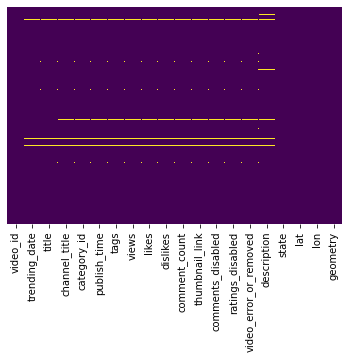

In [476]:
print(df.isnull().any().any())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Pre-proceso de datos

### Datos innecesarios

In [477]:
df.drop(columns = ["title", "publish_time","tags", "thumbnail_link", "video_error_or_removed", "description" ], 
        axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           38528 non-null  object 
 1   trending_date      37617 non-null  object 
 2   channel_title      37422 non-null  object 
 3   category_id        37389 non-null  object 
 4   views              37357 non-null  object 
 5   likes              37352 non-null  float64
 6   dislikes           37352 non-null  float64
 7   comment_count      37352 non-null  float64
 8   comments_disabled  37352 non-null  object 
 9   ratings_disabled   37352 non-null  object 
 10  state              38533 non-null  object 
 11  lat                38533 non-null  float64
 12  lon                38533 non-null  float64
 13  geometry           38533 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.1+ MB


### Datos erróneos

In [478]:
df['video_id_length']  = df['video_id'].str.len()
df = df[df['video_id_length'] == 11]
df.drop(columns = ["video_id_length"], axis = 1, inplace = True)

### Tipos de datos modificados

In [479]:
df['video_id'] = df['video_id'].astype('string')
df['trending_date'] = df['trending_date'].astype('string')
df['channel_title'] = df['channel_title'].astype('string')
df['comments_disabled'] = df['comments_disabled'].astype('string')
df['ratings_disabled'] = df['ratings_disabled'].astype('string')
df['views'] = df['views'].astype('int32')
df['likes'] = df['likes'].astype('int32')
df['dislikes'] = df['dislikes'].astype('int32')
df['comment_count'] = df['comment_count'].astype('int32')
df['category_id'] = df['category_id'].astype('float64')
df['category_id'] = df['category_id'].astype('int32')
df['category_id'] = df['category_id'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36834 entries, 0 to 38532
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           36834 non-null  string 
 1   trending_date      36834 non-null  string 
 2   channel_title      36834 non-null  string 
 3   category_id        36834 non-null  string 
 4   views              36834 non-null  int32  
 5   likes              36834 non-null  int32  
 6   dislikes           36834 non-null  int32  
 7   comment_count      36834 non-null  int32  
 8   comments_disabled  36834 non-null  string 
 9   ratings_disabled   36834 non-null  string 
 10  state              36834 non-null  object 
 11  lat                36834 non-null  float64
 12  lon                36834 non-null  float64
 13  geometry           36834 non-null  object 
dtypes: float64(2), int32(4), object(2), string(6)
memory usage: 3.7+ MB


In [480]:
td = []

for item in df["trending_date"]:
    date = f"20{item[:2]}/{item[6:]}/{item[3:5]}"    
    td.append(date)
    
df['trending_date'] = td
df

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry
0,kzwfHumJyYc,2017/11/14,Lokdhun Punjabi,1,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017/11/14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017/11/14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017/11/14,Eruma Saani,23,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017/11/14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38528,iNHecA3PJCo,2018/06/14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
38529,dpPmPbhcslM,2018/06/14,Flowers TV,24,406828,1726,478,1428,FALSO,FALSO,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398)
38530,mV6aztP58f8,2018/06/14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
38531,qxqDNP1bDEw,2018/06/14,Tarang TV,24,130263,698,115,65,FALSO,FALSO,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291)


In [481]:
df['trending_date']= pd.to_datetime(df['trending_date'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36834 entries, 0 to 38532
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           36834 non-null  string        
 1   trending_date      36834 non-null  datetime64[ns]
 2   channel_title      36834 non-null  string        
 3   category_id        36834 non-null  string        
 4   views              36834 non-null  int32         
 5   likes              36834 non-null  int32         
 6   dislikes           36834 non-null  int32         
 7   comment_count      36834 non-null  int32         
 8   comments_disabled  36834 non-null  string        
 9   ratings_disabled   36834 non-null  string        
 10  state              36834 non-null  object        
 11  lat                36834 non-null  float64       
 12  lon                36834 non-null  float64       
 13  geometry           36834 non-null  object        
dtypes: dat

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry
0,kzwfHumJyYc,2017-11-14,Lokdhun Punjabi,1,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017-11-14,Eruma Saani,23,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38528,iNHecA3PJCo,2018-06-14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
38529,dpPmPbhcslM,2018-06-14,Flowers TV,24,406828,1726,478,1428,FALSO,FALSO,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398)
38530,mV6aztP58f8,2018-06-14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
38531,qxqDNP1bDEw,2018-06-14,Tarang TV,24,130263,698,115,65,FALSO,FALSO,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291)


### Datos NA

False


<AxesSubplot:>

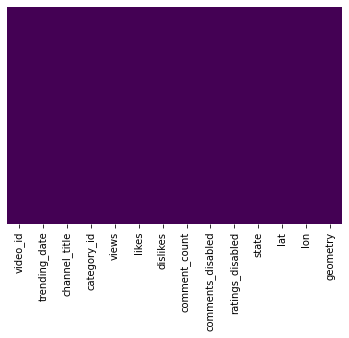

In [482]:
print(df.isnull().any().any())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Incorporación de la columna de categoría

In [483]:
category = pd.read_json("../data/US_category_id.json")
category

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [484]:
print(category["items"][0])
print(category["items"][0]["id"])
print(category["items"][0]["snippet"]["title"])

{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
1
Film & Animation


In [485]:
d = {}

for item in category["items"]:    
    d[item["id"]] = item["snippet"]["title"]

print(d)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [486]:
df['category'] = df['category_id'].map(d)
df

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,category
0,kzwfHumJyYc,2017-11-14,Lokdhun Punjabi,1,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),Film & Animation
1,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),News & Politics
2,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),Entertainment
3,N1vE8iiEg64,2017-11-14,Eruma Saani,23,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),Comedy
4,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38528,iNHecA3PJCo,2018-06-14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929),Comedy
38529,dpPmPbhcslM,2018-06-14,Flowers TV,24,406828,1726,478,1428,FALSO,FALSO,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398),Entertainment
38530,mV6aztP58f8,2018-06-14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129),Entertainment
38531,qxqDNP1bDEw,2018-06-14,Tarang TV,24,130263,698,115,65,FALSO,FALSO,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291),Entertainment


### Exportación del archivo pre-procesado

In [487]:
df.to_csv('../data/export_dataframe.csv', index = False, header=True)

# Visualización de datos

### Leer archivo limpio

In [488]:
df_limpio = pd.read_csv("../data/export_dataframe.csv")
df_limpio

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,category
0,kzwfHumJyYc,2017-11-14,Lokdhun Punjabi,1,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),Film & Animation
1,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),News & Politics
2,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),Entertainment
3,N1vE8iiEg64,2017-11-14,Eruma Saani,23,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),Comedy
4,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36829,iNHecA3PJCo,2018-06-14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929),Comedy
36830,dpPmPbhcslM,2018-06-14,Flowers TV,24,406828,1726,478,1428,FALSO,FALSO,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398),Entertainment
36831,mV6aztP58f8,2018-06-14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129),Entertainment
36832,qxqDNP1bDEw,2018-06-14,Tarang TV,24,130263,698,115,65,FALSO,FALSO,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291),Entertainment


## Por categoría de videos

### 1.- ¿Qué categorías de videos son las de mayor tendencia?

In [489]:
counts1 = df_limpio["category"].value_counts()
counts1 = pd.DataFrame(counts1)
print(counts1)

data = [go.Bar(
    y = counts1['category'],
    x = counts1.index
)]
layout = go.Layout(
    title = 'Número de videos en tendencia por categoría',
    yaxis = dict(title = 'Número de videos en tendencia'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                       category
Entertainment             16457
News & Politics            5155
Music                      3792
Comedy                     3395
People & Blogs             2602
Film & Animation           1641
Education                  1213
Howto & Style               839
Sports                      723
Science & Technology        548
Shows                       203
Nonprofits & Activism       105
Autos & Vehicles             72
Gaming                       63
Movies                       16
Travel & Events               8
Pets & Animals                2


### 2.- ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [490]:
counts2 = df_limpio.groupby("category")
counts2a = pd.DataFrame(counts2.sum()["likes"])
counts2b = pd.DataFrame(counts2.sum()["dislikes"])

counts2a["dislikes"] = counts2b["dislikes"]
print(counts2a)

data = [go.Bar(
    name = 'Likes',
    y = counts2a['likes'],
    x = counts2a.index
    ),
    go.Bar(
    name = 'Dislikes',
    y = counts2a['dislikes'],
    x = counts2a.index
    )
]
layout = go.Layout(
    title = 'Número de likes y dislikes por categoría',
    yaxis = dict(title = 'Número de likes y dislikes'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                           likes  dislikes
category                                  
Autos & Vehicles          539571     22284
Comedy                 172728073   6940709
Education                7407171    244823
Entertainment          390775502  27147595
Film & Animation        68741041   4293601
Gaming                   6595445    335481
Howto & Style            7869922    857647
Movies                    662651     34182
Music                  245529963  14646234
News & Politics         15392113   2711123
Nonprofits & Activism     218112      8730
People & Blogs          23160602   1724044
Pets & Animals            361228      6357
Science & Technology    21317848    911720
Shows                     779128    223922
Sports                  31941577   1292736
Travel & Events            16939       616


### 3.- ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

In [491]:
counts3 = df_limpio.groupby("category")
counts3a = pd.DataFrame(counts2.sum()["likes"])
counts3b = pd.DataFrame(counts2.sum()["dislikes"])

counts3c = pd.DataFrame()
counts3c["ratio"] = counts3a["likes"] / counts3b["dislikes"]
print(counts3c)

counts3c = counts3c.sort_values("ratio")

data = [go.Bar(
    y = counts3c['ratio'],
    x = counts3c.index
)]
layout = go.Layout(
    title = 'Proporción de "Likes" / "Dislikes" por categoría',
    yaxis = dict(title = 'Proporción de "Likes" / "Dislikes"'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                           ratio
category                        
Autos & Vehicles       24.213382
Comedy                 24.886229
Education              30.255209
Entertainment          14.394480
Film & Animation       16.010114
Gaming                 19.659668
Howto & Style           9.176179
Movies                 19.385963
Music                  16.764034
News & Politics         5.677394
Nonprofits & Activism  24.984192
People & Blogs         13.433881
Pets & Animals         56.823659
Science & Technology   23.382012
Shows                   3.479462
Sports                 24.708507
Travel & Events        27.498377


### 4.- ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

In [492]:
counts4 = df.groupby("category")
counts4a = pd.DataFrame(counts2.sum()["views"])
counts4b = pd.DataFrame(counts2.sum()["comment_count"])

counts4c = pd.DataFrame()
counts4c["ratio"] = counts4a["views"] / counts4b["comment_count"]
print(counts4c)

counts4c = counts4c.sort_values("ratio")

data = [go.Bar(
    y = counts4c['ratio'],
    x = counts4c.index
)]
layout = go.Layout(
    title = 'Proporción de "Vistas" / "Comentarios" por categoría',
    yaxis = dict(title = 'Proporción de "Vistas" / "Comentarios"'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                             ratio
category                          
Autos & Vehicles        351.317235
Comedy                  209.341279
Education               154.381351
Entertainment           378.357895
Film & Animation        667.769863
Gaming                  444.210982
Howto & Style           988.464402
Movies                 1327.522807
Music                   578.316866
News & Politics         676.468399
Nonprofits & Activism   515.038617
People & Blogs          510.915339
Pets & Animals          112.942544
Science & Technology     49.218894
Shows                  1331.155995
Sports                  507.292256
Travel & Events         561.414216


## Por el tiempo transcurrido

### 5.- ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

In [493]:
td = []

for item in df["trending_date"]:
    date = str(item)[:-12]        
    td.append(date)
    
df['trending_date2'] = td

In [494]:
counts5 = pd.DataFrame(df["trending_date2"].value_counts())
print(counts5)
df.drop(columns = ["trending_date2"], axis = 1, inplace = True)

data = [go.Bar(
    y = counts5['trending_date2'],
    x = counts5.index
)]
layout = go.Layout(
    title = 'Volumen de los videos en tendencia a lo largo del tiempo',
    yaxis = dict(title = 'Número de videos en tendencia'),
    xaxis = dict(title = 'Fecha de video en tendencia')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

         trending_date2
2017-12            5744
2018-05            5582
2018-01            5391
2018-03            5275
2018-02            4754
2018-04            4401
2017-11            3208
2018-06            2479


## Por canales de Youtube

### 6.-  ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

In [495]:
counts6 = pd.DataFrame(df["channel_title"].value_counts())
counts6a = counts6[:10]
counts6b = counts6[counts6["channel_title"]<2]

print(counts6)
print(counts6a)
print(counts6b)

                       channel_title
VikatanTV                        280
etvteluguindia                   280
Flowers Comedy                   270
ETV Plus India                   251
RadaanMedia                      240
...                              ...
Cinecurry Malayalam                1
Challenge Mantra                   1
REPUBLIC NEWS KANNADA              1
Indian World                       1
2DayCinema                         1

[1423 rows x 1 columns]
                channel_title
VikatanTV                 280
etvteluguindia            280
Flowers Comedy            270
ETV Plus India            251
RadaanMedia               240
SAB TV                    237
SET India                 237
ETV Jabardasth            234
mallemalatv               228
Tarang TV                 223
                         channel_title
Boombox Music                        1
Viral in India                       1
PropheC Productions                  1
Hyderabad Diaries Vlogs              1
Wide A

In [496]:
data = [go.Bar(
    y = counts6['channel_title'],
    x = counts6.index
)]
layout = go.Layout(
    title = 'Número de veces en tendencia por canales de Youtube',
    yaxis = dict(title = 'Número de veces en tendencia'),
    xaxis = dict(title = 'Canales de Youtube')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

In [497]:
data = [go.Bar(
    y = counts6a['channel_title'],
    x = counts6a.index
)]
layout = go.Layout(
    title = 'Canales de Youtube con más número de veces en tendencia',
    yaxis = dict(title = 'Número de veces en tendencia'),
    xaxis = dict(title = 'Canales de Youtube')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

In [498]:
data = [go.Bar(
    y = counts6b['channel_title'],
    x = counts6b.index
)]
layout = go.Layout(
    title = 'Canales de Youtube con menos número de veces en tendencia',
    yaxis = dict(title = 'Número de veces en tendencia'),
    xaxis = dict(title = 'Canales de Youtube')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

## Por la geografía del país

### 7.-  ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

In [528]:
counts7 = df.groupby("state")
counts7a = pd.DataFrame(counts7.sum()["likes"])
counts7b = pd.DataFrame(counts7.sum()["dislikes"])
counts7c = pd.DataFrame(counts7.sum()["views"])
counts7d = pd.DataFrame(counts7.mean()["lat"])
counts7e = pd.DataFrame(counts7.mean()["lon"])

counts7a["dislikes"] = counts7b["dislikes"]
counts7a["views"] = counts7c["views"]
counts7a["lat"] = counts7d["lat"]
counts7a["lon"] = counts7e["lon"]
print(counts7a)

                           likes  dislikes       views        lat        lon
state                                                                       
Andaman And Nicobar     35251574   1816549  1318750738  11.667026  92.735983
Andhra Pradesh          39210958   1995459  1382741148  14.750429  78.570026
Arunachal Pradesh       30856418   1596800  1238527193  27.100399  93.616601
Assam                   25587987   1480745  1045047489  26.749981  94.216667
Bihar                   28552918   2662127  1135792110  25.785414  87.479973
Chandigarh              35401657   2065791  1337671482  30.719997  76.780006
Chhattisgarh            28113659   2170335  1042989209  22.090420  82.159987
Dadra And Nagar Haveli  29570315   1663274  1130122008  20.266578  73.016618
Delhi                   31654223   1910810  1200019635  28.669993  77.230004
Goa                     30314475   3145522  1246165686  15.491997  73.818001
Haryana                 30631201   2029442  1224440051  28.450006  77.019991

In [529]:
fig = px.density_mapbox(
    counts7a,
    lat = 'lat',
    lon = 'lon',
    z = 'likes',
    color_continuous_scale='Inferno',
    hover_name = counts7a.index,
    radius = 30, zoom = 1, height = 600,
    title = 'Número de likes por estado'
)

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout()
fig.show()

In [530]:
fig = px.density_mapbox(
    counts7a,
    lat = 'lat',
    lon = 'lon',
    z = 'dislikes',
    color_continuous_scale='Inferno',
    hover_name = counts7a.index,
    radius = 30, zoom = 1, height = 600,
    title = 'Número de dislikes por estado'
)

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout()
fig.show()

In [527]:
fig = px.density_mapbox(
    counts7a,
    lat = 'lat',
    lon = 'lon',
    z = 'views',
    color_continuous_scale='Inferno',
    hover_name = counts7a.index,
    radius = 30, zoom = 1, height = 600,
    title = 'Número de views por estado'
)

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout()
fig.show()

# Modelizar y evaluar los datos

### 1.- ¿Es factible predecir el número de "Vistas" o "Me gusta" o "No me gusta"?

#### Predicción de views

In [503]:
X = df_limpio[['likes', 'dislikes']]
y = df_limpio['views']

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [505]:
lm = LinearRegression()

In [506]:
lm.fit(X_train,y_train)

LinearRegression()

In [507]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
likes,25.082973
dislikes,37.502647


#### Residuales

In [508]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Cantidad de residuo por video')

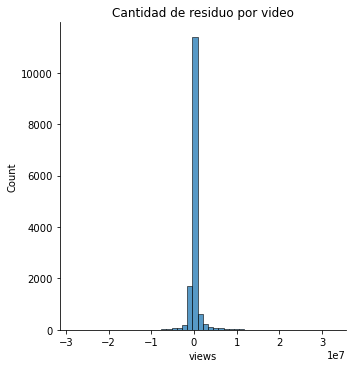

In [509]:
sns.displot((y_test-predictions),bins=50);
plt.title('Cantidad de residuo por video')

#### Métricas

In [510]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 625193.5362078652
MSE: 2507126571080.55
RMSE: 1583390.8459633552


#### Predicción de likes

In [511]:
X = df_limpio[['views', 'dislikes']]
y = df_limpio['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()

lm.fit(X_train,y_train)

coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
views,0.025254
dislikes,0.175559


MAE: 17984.259744952466
MSE: 2524430791.2290354
RMSE: 50243.71394740874


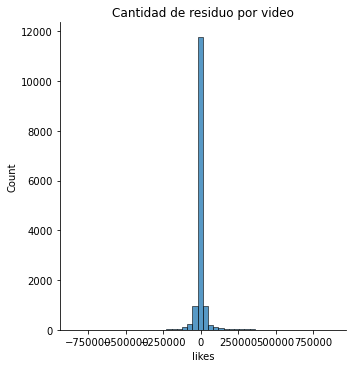

In [512]:
predictions = lm.predict(X_test)

sns.displot((y_test-predictions),bins=50)
plt.title('Cantidad de residuo por video')

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#### Predicción de dislikes

In [513]:
X = df_limpio[['likes', 'views']]
y = df_limpio['dislikes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()

lm.fit(X_train,y_train)

coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
likes,0.010930
views,0.002351


MAE: 2014.5610599081372
MSE: 207924890.09274662
RMSE: 14419.600899218627


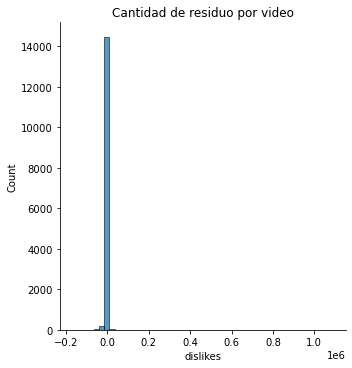

In [514]:
predictions = lm.predict(X_test)

sns.displot((y_test-predictions),bins=50)
plt.title('Cantidad de residuo por video')

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### 2.- ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

In [515]:
df_limpio_aux = copy.deepcopy(df_limpio)

In [516]:
polaridad = []
for index, row in df_limpio_aux.iterrows():
    if row['likes'] > row['dislikes']:
        polaridad.append('positivo')
    elif row['comment_count'] == 0 or row['likes'] == row['dislikes']:
        polaridad.append('neutro')
    else:
        polaridad.append('negativo')

In [517]:
df_limpio_aux['polaridad'] = np.array([pol for pol in polaridad])

In [518]:
df_limpio_aux.head(10)

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,category,polaridad
0,kzwfHumJyYc,2017-11-14,Lokdhun Punjabi,1,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),Film & Animation,positivo
1,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),News & Politics,neutro
2,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),Entertainment,positivo
3,N1vE8iiEg64,2017-11-14,Eruma Saani,23,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),Comedy,positivo
4,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),Entertainment,positivo
5,il_pSa5l98w,2017-11-14,Dil Raju,24,6106669,98612,4185,4763,FALSO,FALSO,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217),Entertainment,positivo
6,7MxiQ4v0EnE,2017-11-14,Speed Records,10,5718766,127477,7134,8063,FALSO,FALSO,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),Music,positivo
7,c64I9HNpiOY,2017-11-14,T-Series,10,10588371,132738,8812,10847,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),Music,positivo
8,KObFEYCaRx8,2017-11-14,Top Telugu Media,24,118223,520,53,23,FALSO,FALSO,Andaman And Nicobar,11.667026,92.735983,POINT (92.73598262 11.66702557),Entertainment,positivo
9,g8QsfJhFpjY,2017-11-14,Jump Cuts,24,969030,59798,1545,2404,FALSO,FALSO,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895),Entertainment,positivo


In [519]:
total = df_limpio_aux['polaridad'].value_counts()
total = pd.DataFrame(total)
total

,polaridad
positivo,35428
neutro,931
negativo,475


In [520]:
data = [go.Bar(
    y = total['polaridad'],
    x = total.index
)]
layout = go.Layout(
    title = 'Número de videos en tendencia por tipo de comentario',
    yaxis = dict(title = 'Número de videos en tendencia'),
    xaxis = dict(title = 'Tipo de comentario')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

#### Mayor tendencia

In [521]:
mayor_tendencia = df_limpio_aux.sort_values(by = 'views', ascending = False).head(100)

In [522]:
mayor = mayor_tendencia['polaridad'].value_counts()
mayor = pd.DataFrame(mayor)
mayor

,polaridad
positivo,100


In [523]:
data = [go.Bar(
    y = mayor['polaridad'],
    x = mayor.index
)]
layout = go.Layout(
    title = 'Número de videos en mayor tendencia por tipo de comentario',
    yaxis = dict(title = 'Número de videos en mayor tendencia'),
    xaxis = dict(title = 'Tipo de comentario')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

#### Menor tendencia

In [524]:
menor_tendencia = df_limpio_aux.sort_values(by = 'views').head(100)

In [525]:
menor = menor_tendencia['polaridad'].value_counts()
menor = pd.DataFrame(menor)
menor

,polaridad
positivo,94
neutro,5
negativo,1


In [526]:
data = [go.Bar(
    y = menor['polaridad'],
    x = menor.index
)]
layout = go.Layout(
    title = 'Número de videos en menor tendencia por tipo de comentario',
    yaxis = dict(title = 'Número de videos en menor tendencia'),
    xaxis = dict(title = 'Tipo de comentario')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

# Todo está explicado en el doc para mejor entendimiento y organización